# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. 
**Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Путь к файлу: /datasets/games.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

# Изучение данных из файла

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод
1. Заголовки нужно привести в нижний регистр
2. Year_of_Release - нужно привести в целочисленное
3. Critic_Score, User_Score, rating -есть пропуски, нужно посмотреть как их заполнить.

# Предобработка данных

In [5]:
df.duplicated().sum()

0

Дублей нет

## Заменим названия столбцов

Приведем загловки в нижний регистр

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Обработаем пропуски и преобразуем данные

Проверим пропуски

In [10]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [11]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У столбцов name и genre - одинаковые пропуски, поэтому мы их удалим

In [12]:
df = df.dropna(subset=['name'])

critic_score, rating, user_score - пропуски на данный момент мы не можем не заполнить не удалить, а аббревиатра tdb - что означает 'неизвестно' или скоро будут обнародаваны, мы заменим на nan, чтобы не мешало обработке

In [13]:
df[df['user_score']=='tbd']['user_score']

119      tbd
301      tbd
520      tbd
645      tbd
657      tbd
        ... 
16695    tbd
16697    tbd
16698    tbd
16704    tbd
16706    tbd
Name: user_score, Length: 2424, dtype: object

In [14]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Теперь заменим пропуски user_score и critic_score, на отрицалтельное значение, чтобы можно было проводить анализ

In [ ]:
df['critic_score'] = df['critic_score'].fillna(-1)

df['user_score'] = df['user_score'].fillna(-1)

Так как у rating есть тоже пропуски, их мы не знаем, поэтому заменим на unknown

In [ ]:
df['rating'] = df['rating'].fillna('unknown')

In [17]:
df = df.dropna(subset=['year_of_release'])

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [ ]:
df.isna().mean()

Теперь пропусков нет и мы заменим тип данных на int у количественных

In [20]:
df['critic_score'] = df['critic_score'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


# Расчёты и добавление результатов в таблицу

## Посчитаем суммарные продажи во всех регионах

In [22]:
df['revenue'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis =1)

In [23]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01


# Исследовательский анализ данных

## Cколько игр выпускалось в разные годы

In [24]:
games_year = df.pivot_table(index = 'year_of_release', aggfunc ={'name':'count'})

In [25]:
games_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0, 0.5, 'Количество игр')

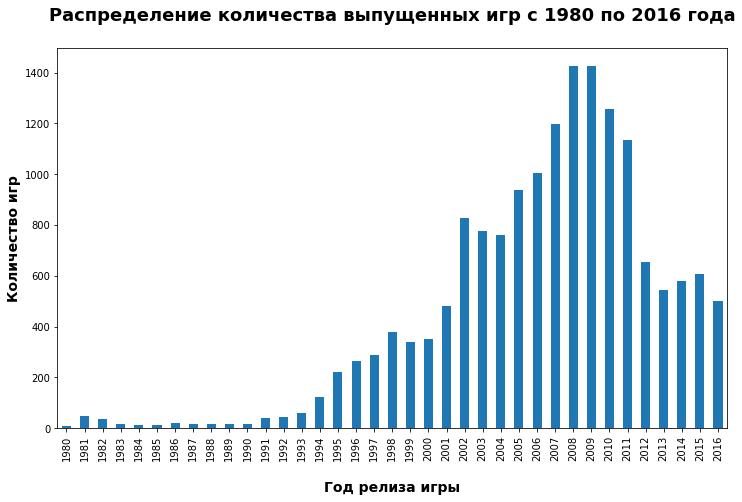

In [26]:
games_year.plot(y='name', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение количества выпущенных игр с 1980 по 2016 года\n', fontsize=18, fontweight="bold")
plt.xlabel("\nГод релиза игры", fontsize=14, fontweight="bold")
plt.ylabel("Количество игр", fontsize=14, fontweight="bold")

## Вывод

Пик выхода игр пришелся на 2007 -2011г, далее произошел спад по количеству выходов, а началась тенденция по разработке игр с 1994г

## Как менялись продажи по платформам

In [27]:
platform_sales = df.pivot_table(index = 'platform',values = 'revenue',aggfunc = 'sum')

In [28]:
platform_sales

,revenue
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73
GEN,28.35


Text(0, 0.5, 'выручка в млн')

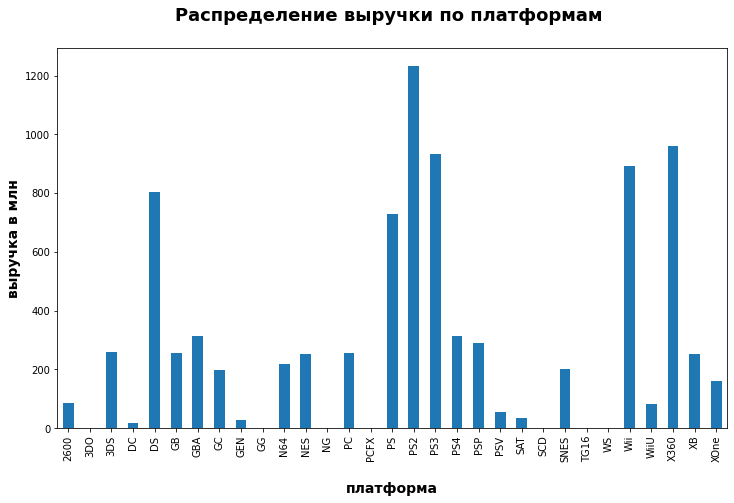

In [29]:
platform_sales.plot(y='revenue', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по платформам \n', fontsize=18, fontweight="bold")
plt.xlabel("\nплатформа", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

Исходя из выручки - самые популярные платформы - ps2,ps3,xbox360. 

Теперь посмотрим выручку по годам и платформам. Отберем топ 10

In [30]:
platform_year_top = df.pivot_table(index='platform',aggfunc={'revenue':'sum'}).nlargest(10, columns='revenue')

In [31]:
platform_year_top

,revenue
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'выручка в млн')

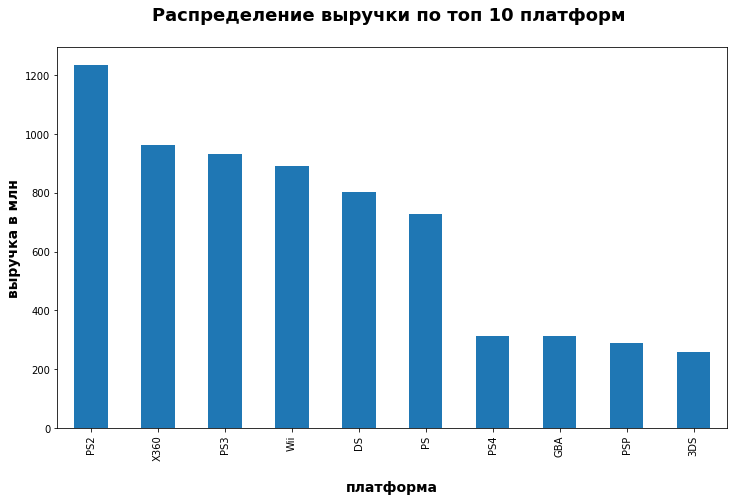

In [32]:
platform_year_top.plot(y='revenue', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по топ 10 платформ \n', fontsize=18, fontweight="bold")
plt.xlabel("\nплатформа", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

In [33]:
platform_year_revenue = df.query('platform in @platform_year_top.index')

In [34]:
platform_year_revenue

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1,-1.0,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01


создаем список с временным диапазоном

In [35]:
years_list = []
for i in range(1980, 2017):
    years_list.append(i)

In [36]:
platform_list = platform_year_revenue['platform'].unique()

Построим гистограммы

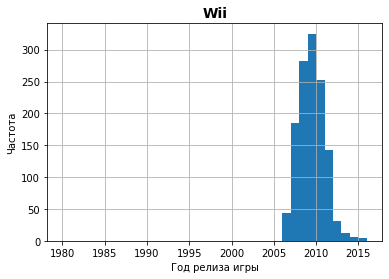

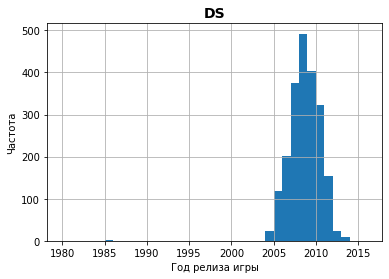

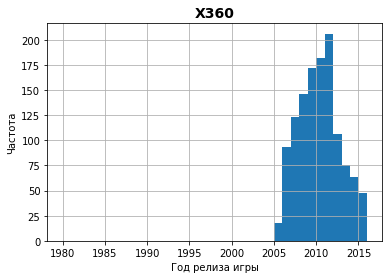

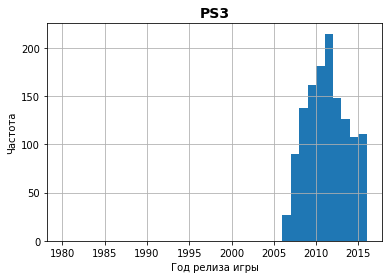

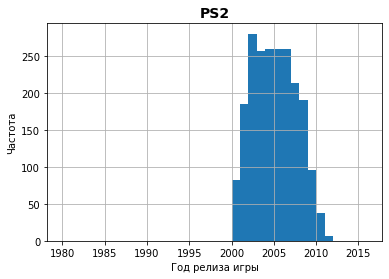

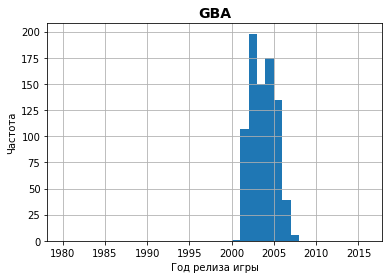

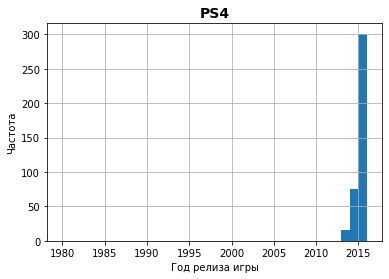

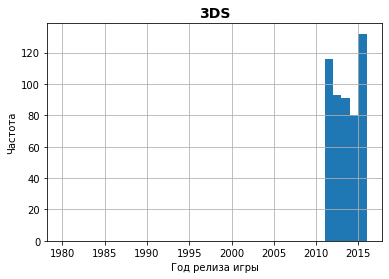

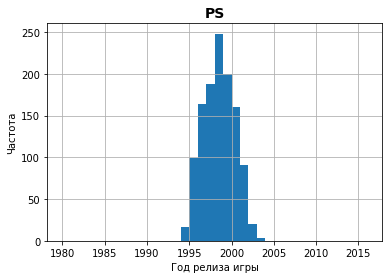

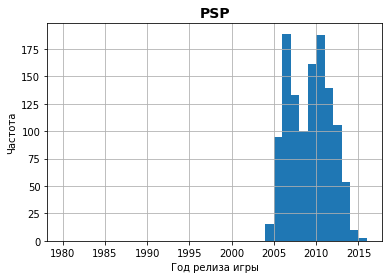

In [37]:
for i in range(0, len(platform_list)):
    platform_year_revenue[platform_year_revenue['platform']==platform_list[i]]\
    .plot(kind='hist', bins=years_list, legend=False, grid=True)
    
    plt.title(label=platform_list[i], fontsize=14, fontweight="bold")
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

## Вывод

На графиках отчетливо видно, взлеты и падения платформы, от ее выхода на рынок, до смены или новым поколением или же конкуренцией. На примере PS2 видно, как до 2009г у них росли продажи, а далее на ее смену пришла PS3,далее проанализируем сроки жизни платформы

## Срок "жизни" платформы

Возьмем те платформы, которые попали в ТОП 10, для этого сделаем сводную таблицу 

In [38]:
platform_year_revenue_life = platform_year_revenue.pivot_table(index = 'platform', values = 'year_of_release', aggfunc=[min, max])

In [39]:
platform_year_revenue_life

,min,max
,year_of_release,year_of_release
platform,,
3DS,2011,2016
DS,1985,2013
GBA,2000,2007
PS,1994,2003
PS2,2000,2011
PS3,2006,2016
PS4,2013,2016
PSP,2004,2015


In [40]:
platform_year_revenue_life.columns = ['_'.join(col).strip() for col in platform_year_revenue_life.columns.values]

In [41]:
platform_year_revenue_life = platform_year_revenue_life.reset_index()

In [42]:
platform_year_revenue_life['lifetime'] = platform_year_revenue_life['max_year_of_release'] - platform_year_revenue_life['min_year_of_release']

In [43]:
platform_year_revenue_life

,platform,min_year_of_release,max_year_of_release,lifetime
0,3DS,2011,2016,5
1,DS,1985,2013,28
2,GBA,2000,2007,7
3,PS,1994,2003,9
4,PS2,2000,2011,11
5,PS3,2006,2016,10
6,PS4,2013,2016,3
7,PSP,2004,2015,11
8,Wii,2006,2016,10
9,X360,2005,2016,11


In [44]:
platform_life_mean =platform_year_revenue_life['lifetime'].median()

In [45]:
platform_life_mean

10.0

## Вывод

Исходя из полученных данных , срок жизни платформы около 10 лет, исходя из топ платформ, которые у нас есть. PS4 не берем в расчет, так как данные у нас по 2016 г. а ее смена = ps5 вышла в 2020 г

## Потенциально прибыльные платформы

Актуальным период возьмем с 2012г по 2016г , так как это начало периода после спада выпуска игр.

Сделаем срез

In [46]:
platform_year_filtred_top = df.query('year_of_release >= 2012')

In [47]:
platform_year_filtred_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


In [48]:
platform_year_relevant_top = platform_year_filtred_top.pivot_table(index = 'platform', values = 'revenue', aggfunc ='sum').sort_values(by='revenue', ascending=False)

In [49]:
platform_year_relevant_top

,revenue
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Text(0, 0.5, 'выручка в млн')

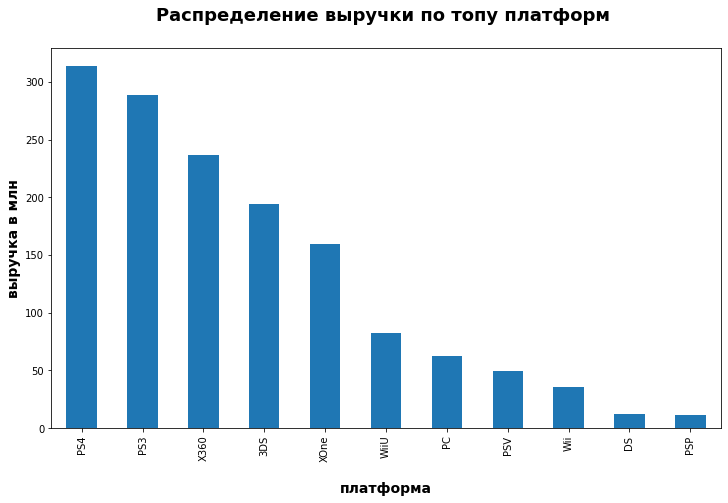

In [50]:
platform_year_relevant_top.plot(y='revenue', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по топу платформ \n', fontsize=18, fontweight="bold")
plt.xlabel("\nплатформа", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

Построим гистограмму по годам

In [51]:
years_list_rel = []
for i in range(2012,2017):
  years_list_rel.append(i)

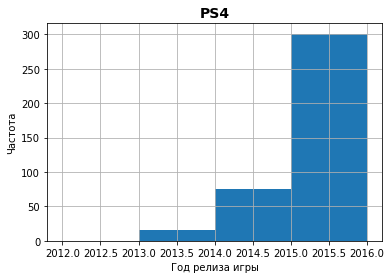

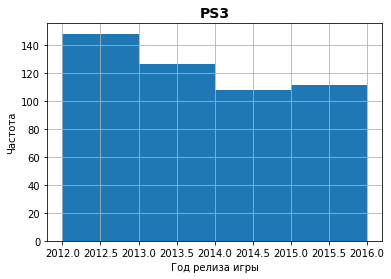

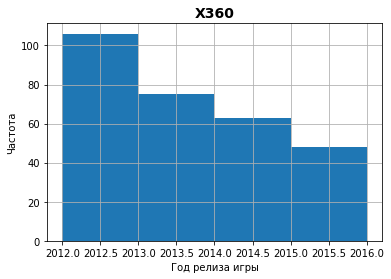

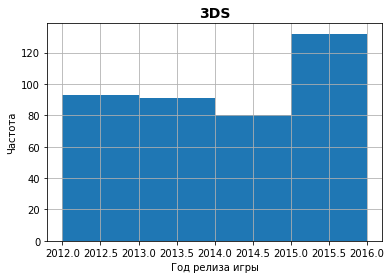

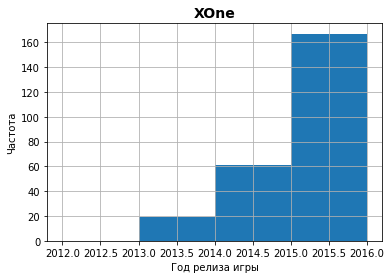

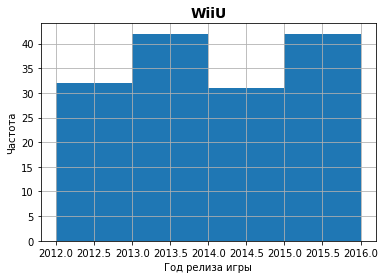

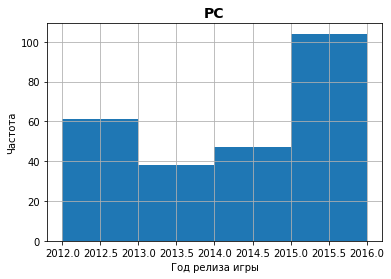

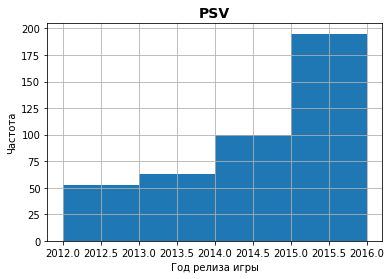

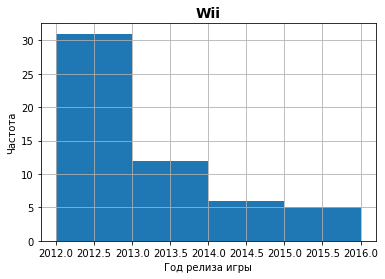

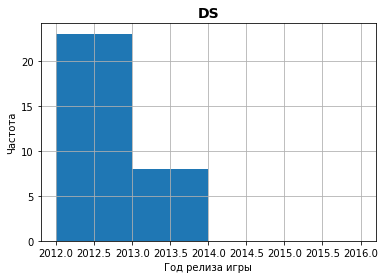

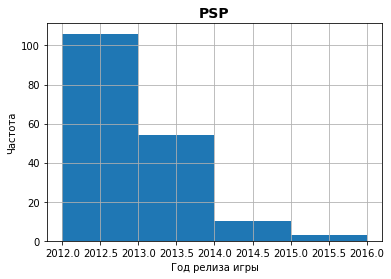

In [52]:
for i in range(0, len(platform_year_relevant_top.index)):
    platform_year_filtred_top[platform_year_filtred_top['platform']==platform_year_relevant_top.index[i]]\
    .plot(kind='hist', bins=years_list_rel, legend=False, title=platform_year_relevant_top.index[i], grid=True)
    
    plt.title(label=platform_year_relevant_top.index[i], fontsize=14, fontweight="bold")
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

## Вывод

На графиках отчетливо видно, как платформы сменяют друг друга, при выходе новой. Пример PSP уходит с рынка , а на ее место в продажах приходит PSV (PlayStation Vita) , так и в другой представленности ps2 -> ps3-> ps4 и представители microsoft - xbox360 -> xbox one, у представителей Nintendo - ds -> 3ds и Wii -> WIIU

## Глобальные продажи игр 

In [53]:
global_platform = platform_year_filtred_top

In [54]:
global_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


(0.0, 2.5)

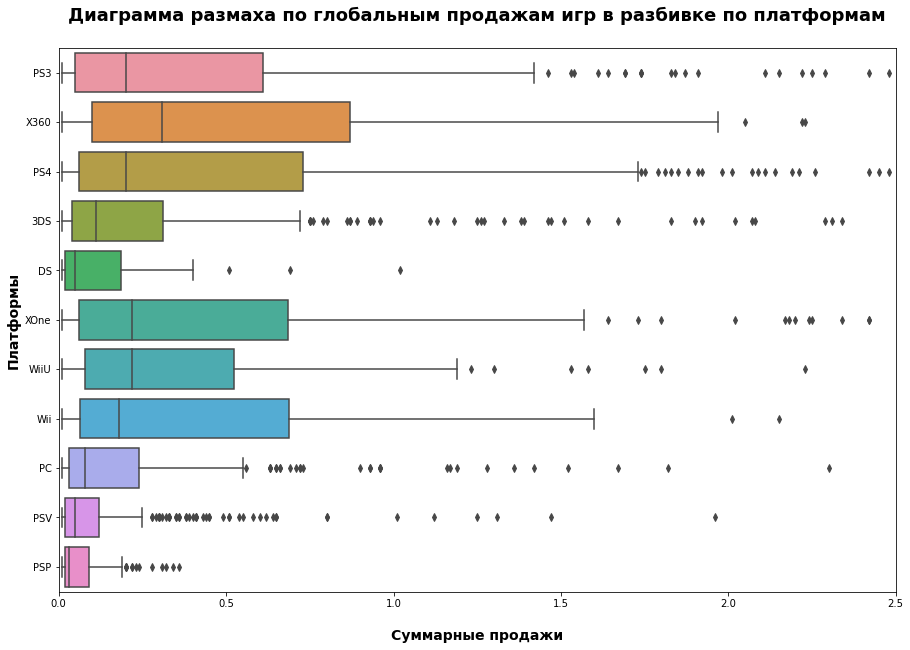

In [55]:
plt.figure(figsize=(15,10))
sns.boxplot(data = global_platform, x='revenue', y='platform')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам\n', fontsize=18, fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14, fontweight="bold")
plt.ylabel("Платформы", fontsize=14, fontweight="bold")
plt.xlim(0, 2.5)

## Вывод 

По межквартальному размаху видим, что популярные платформы - xbox 360 и ps4, за ними идут ps3 и xbox one

## Влияние на продажи от оценок пользователей и критиков

In [56]:
df_ps4 = platform_year_filtred_top.query('platform == "PS4" and critic_score >= 0')

In [57]:
df_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01


Text(0, 0.5, 'Продажи')

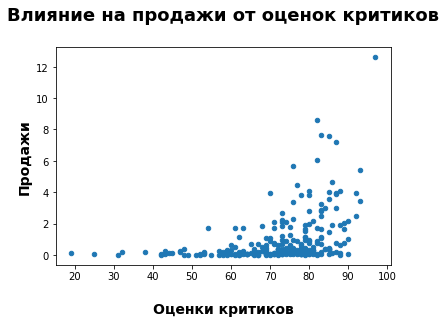

In [58]:
df_ps4.plot.scatter(x='critic_score', y='revenue')

plt.title(label='Влияние на продажи от оценок критиков\n', fontsize=18, fontweight="bold")
plt.xlabel("\nОценки критиков", fontsize=14, fontweight="bold")
plt.ylabel("Продажи", fontsize=14, fontweight="bold")

In [59]:
df_ps4[['critic_score', 'revenue']].corr()

,critic_score,revenue
critic_score,1.000000,0.406568
revenue,0.406568,1.000000


Как видим, что от оценок критиков зависят продажи, там где высокие оценки и высокие продажи. О чем нам говорит умеренная корреляция

Text(0, 0.5, 'Продажи')

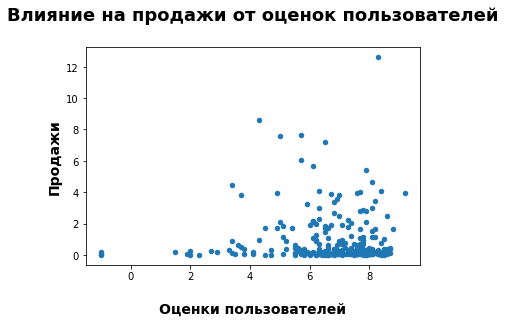

In [60]:
df_ps4.plot.scatter(x='user_score', y='revenue')

plt.title(label='Влияние на продажи от оценок пользователей\n', fontsize=18, fontweight="bold")
plt.xlabel("\nОценки пользователей", fontsize=14, fontweight="bold")
plt.ylabel("Продажи", fontsize=14, fontweight="bold")

In [61]:
df_ps4[['user_score', 'revenue']].corr()

,user_score,revenue
user_score,1.00000,0.00126
revenue,0.00126,1.00000


Продажи от оценок пользователей вообще не зависят, о чем нам говорит и диаграмма и корреляция

Проверим теперь на остальных платформах из топ продаж

In [62]:
xone = platform_year_filtred_top.query('platform =="XOne" and critic_score>= 0')

Text(0, 0.5, 'Продажи')

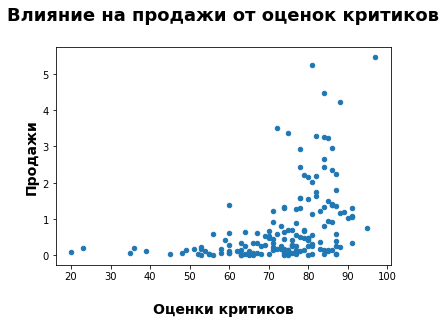

In [63]:
xone.plot.scatter(x='critic_score', y='revenue')

plt.title(label='Влияние на продажи от оценок критиков\n', fontsize=18, fontweight="bold")
plt.xlabel("\nОценки критиков", fontsize=14, fontweight="bold")
plt.ylabel("Продажи", fontsize=14, fontweight="bold")

In [64]:
xone[['critic_score', 'revenue']].corr()

,critic_score,revenue
critic_score,1.000000,0.416998
revenue,0.416998,1.000000


Text(0, 0.5, 'Продажи')

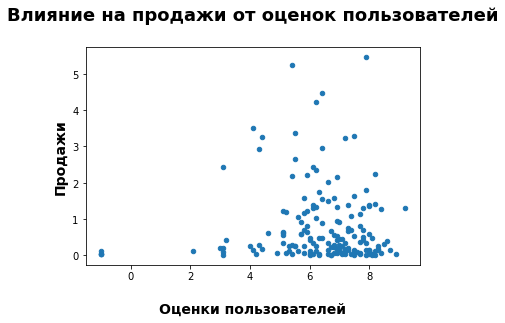

In [65]:
xone.plot.scatter(x='user_score', y='revenue')

plt.title(label='Влияние на продажи от оценок пользователей\n', fontsize=18, fontweight="bold")
plt.xlabel("\nОценки пользователей", fontsize=14, fontweight="bold")
plt.ylabel("Продажи", fontsize=14, fontweight="bold")

In [66]:
xone[['user_score', 'revenue']].corr()

,user_score,revenue
user_score,1.000000,0.001079
revenue,0.001079,1.000000


In [67]:
df_3ds = platform_year_filtred_top.query('platform =="3DS" and critic_score>= 0')

Text(0, 0.5, 'Продажи')

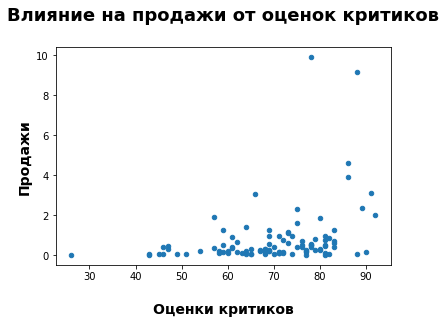

In [68]:
df_3ds.plot.scatter(x='critic_score', y='revenue')

plt.title(label='Влияние на продажи от оценок критиков\n', fontsize=18, fontweight="bold")
plt.xlabel("\nОценки критиков", fontsize=14, fontweight="bold")
plt.ylabel("Продажи", fontsize=14, fontweight="bold")

In [69]:
df_3ds[['critic_score', 'revenue']].corr()

,critic_score,revenue
critic_score,1.000000,0.320803
revenue,0.320803,1.000000


Text(0, 0.5, 'Продажи')

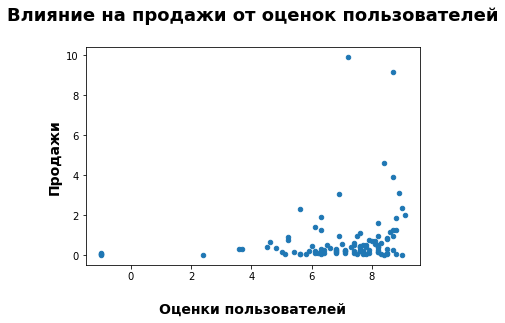

In [70]:
df_3ds.plot.scatter(x='user_score', y='revenue')

plt.title(label='Влияние на продажи от оценок пользователей\n', fontsize=18, fontweight="bold")
plt.xlabel("\nОценки пользователей", fontsize=14, fontweight="bold")
plt.ylabel("Продажи", fontsize=14, fontweight="bold")

In [71]:
df_3ds[['user_score', 'revenue']].corr()

,user_score,revenue
user_score,1.000000,0.202691
revenue,0.202691,1.000000


## Вывод

Оценки критиков влияют на продажи , особенно при оценке близкой к 100, а оценки пользователей не влияют для платформ PS4 и Xone, но влияют на 3DS, значит оценки пользователей важны в Японии, о чем говорит и корреляция

# Распределение игр по жанрам

Для начала оценим долю жанров в играх

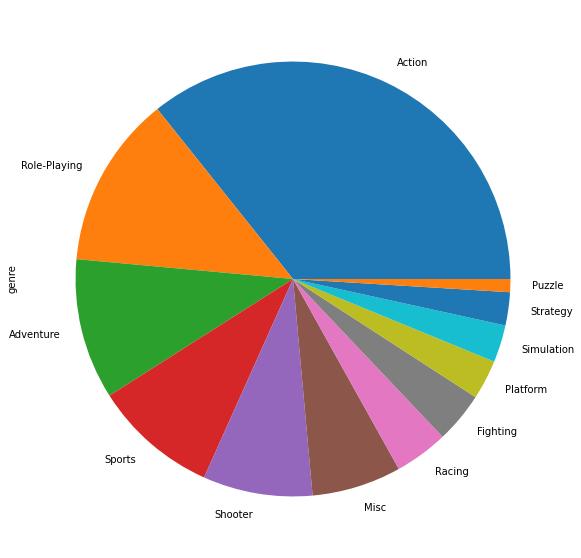

In [72]:
platform_year_filtred_top['genre'].value_counts().plot(kind = 'pie', figsize=(10, 10), legend=False)

In [73]:
relevant_genre = platform_year_filtred_top.pivot_table(index = 'genre', values = 'revenue', aggfunc ='mean').sort_values(by='revenue', ascending=False)

Text(0, 0.5, 'выручка в млн')

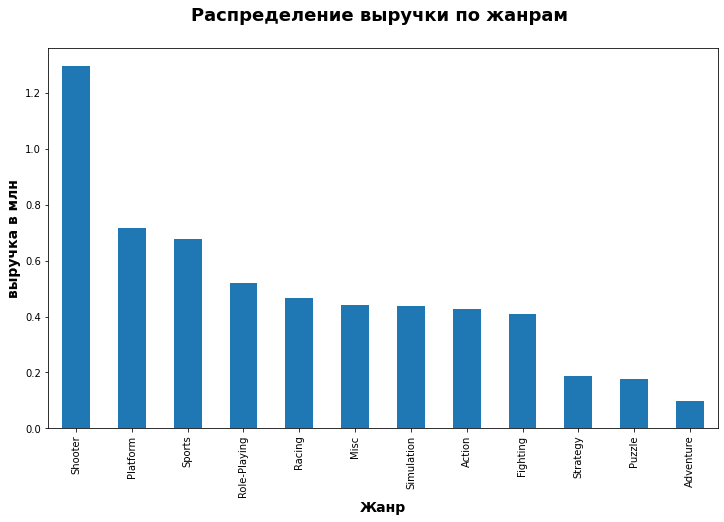

In [74]:
relevant_genre.plot(y='revenue', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по жанрам \n', fontsize=18, fontweight="bold")
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

## Вывод

Самые прибыльные жанры, которые выделяются это shooter


# Портрет пользователя каждого региона

## ТОП 5 платформ по регионам

In [75]:
new_platform = platform_year_filtred_top.query('platform in ("PS4", "XOne","3DS", "WiiU", "PSV")')

In [76]:
new_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,unknown,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


In [77]:
top_platform_na = new_platform.pivot_table(index ='platform', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).nlargest(5, columns='na_sales')

Text(0, 0.5, 'выручка в млн')

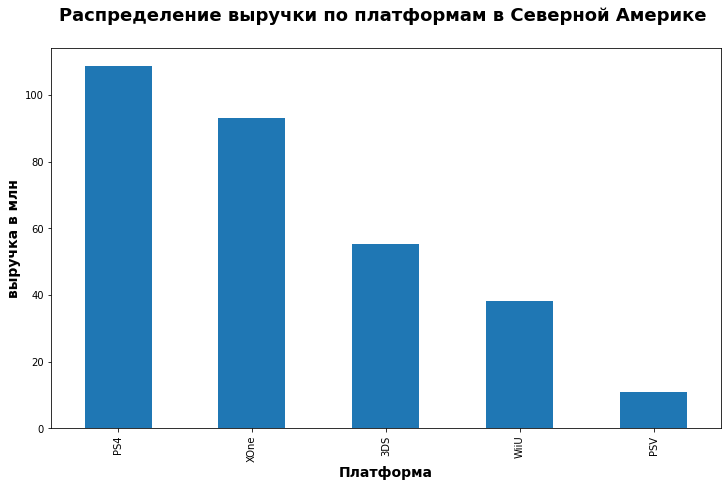

In [78]:
top_platform_na.plot(y='na_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по платформам в Северной Америке \n', fontsize=18, fontweight="bold")
plt.xlabel("Платформа", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

In [79]:
top_platform_eu = new_platform.pivot_table(index ='platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).nlargest(5, columns='eu_sales')

Text(0, 0.5, 'выручка в млн')

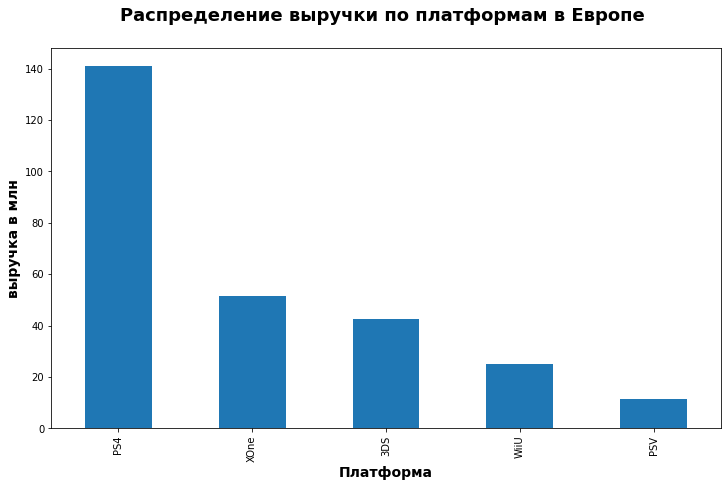

In [80]:
top_platform_eu.plot(y='eu_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по платформам в Европе \n', fontsize=18, fontweight="bold")
plt.xlabel("Платформа", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

In [81]:
top_platform_jp = new_platform.pivot_table(index ='platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).nlargest(5, columns='jp_sales')

Text(0, 0.5, 'выручка в млн')

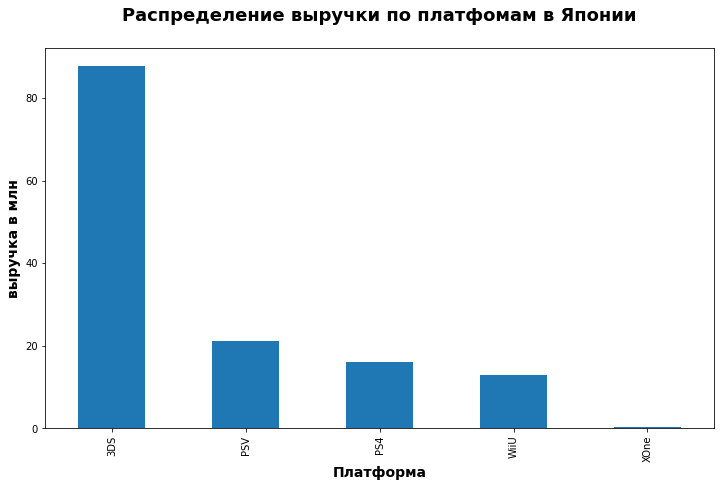

In [82]:
top_platform_jp.plot(y='jp_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по платфомам в Японии\n', fontsize=18, fontweight="bold")
plt.xlabel("Платформа", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

## Вывод

Попуряные платформы : в Северной Америке и в Европе это - XOne, PS4, а в Японии - 3DS

## ТОП 5 жанров по регионам

In [83]:
top_genre_na = new_platform.pivot_table(index ='genre', values = 'na_sales', aggfunc = 'mean').sort_values(by='na_sales', ascending=False).nlargest(5, columns='na_sales')

Text(0, 0.5, 'выручка в млн')

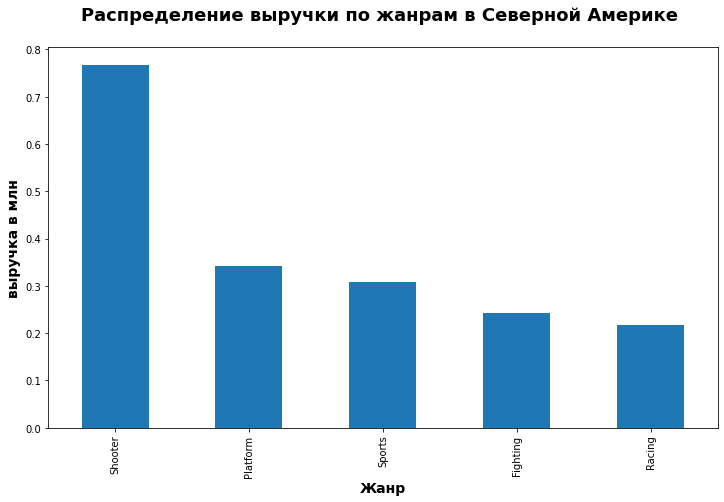

In [84]:
top_genre_na.plot(y='na_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по жанрам в Северной Америке \n', fontsize=18, fontweight="bold")
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

In [85]:
top_genre_eu = new_platform.pivot_table(index ='genre', values = 'eu_sales', aggfunc = 'mean').sort_values(by='eu_sales', ascending=False).nlargest(5, columns='eu_sales')

Text(0, 0.5, 'выручка в млн')

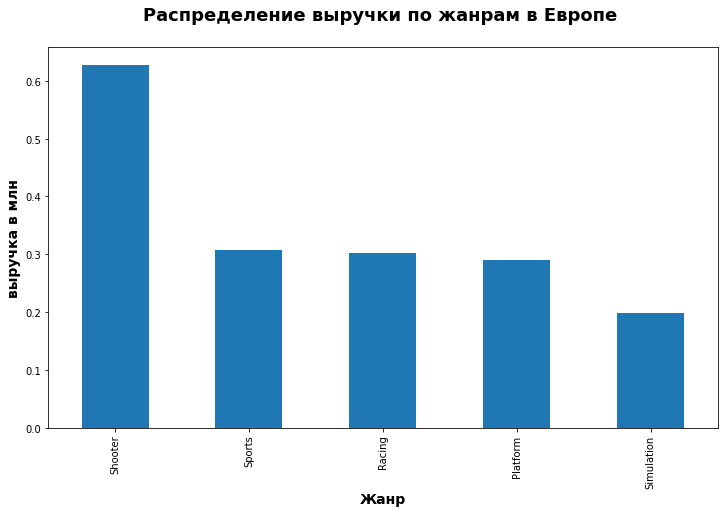

In [86]:
top_genre_eu.plot(y='eu_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по жанрам в Европе \n', fontsize=18, fontweight="bold")
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

In [87]:
top_genre_jp = new_platform.pivot_table(index ='genre', values = 'jp_sales', aggfunc = 'mean').sort_values(by='jp_sales', ascending=False).nlargest(5, columns='jp_sales')

Text(0, 0.5, 'выручка в млн')

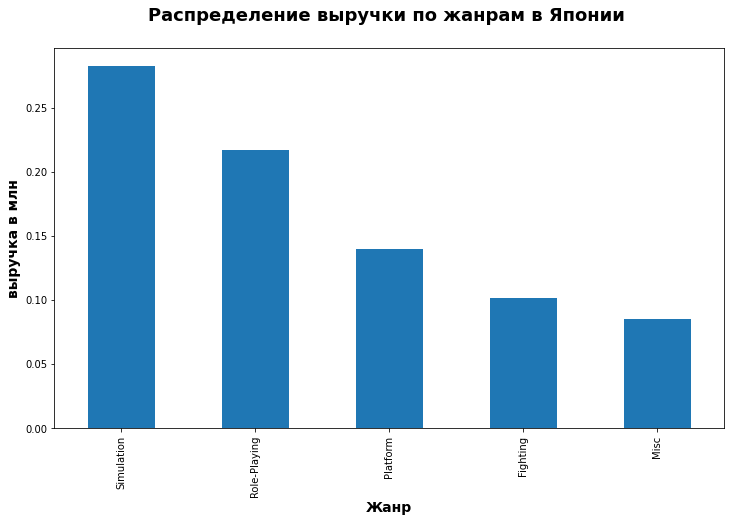

In [88]:
top_genre_jp.plot(y='jp_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по жанрам в Японии \n', fontsize=18, fontweight="bold")
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

## Вывод

В Северной Америке и Европе популярны игры жанров Shooter, а в Японии популярны игры в жанре Simulation

## Влияние рейтинга ESRB на продажи

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет.

«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. 

«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. 

Также отбросим значения unknown - это пустые значения.


In [89]:
total_rating_na = new_platform.pivot_table(index ='rating', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False)

In [90]:
#total_rating_na = total_rating_na.query('rating != "unknown"')

Text(0, 0.5, 'выручка в млн')

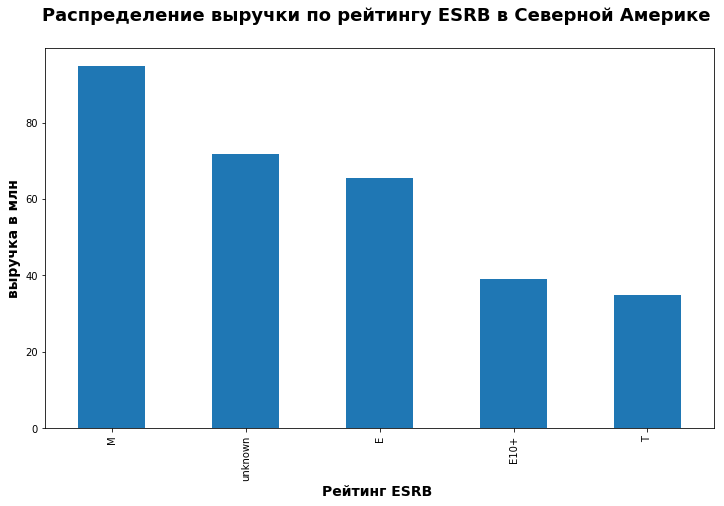

In [91]:
total_rating_na.plot(y='na_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по рейтингу ESRB в Северной Америке \n', fontsize=18, fontweight="bold")
plt.xlabel("Рейтинг ESRB ", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

In [92]:
total_rating_eu = new_platform.pivot_table(index ='rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False)

In [93]:
#total_rating_eu = total_rating_eu.query('rating != "unknown"')

Text(0, 0.5, 'выручка в млн')

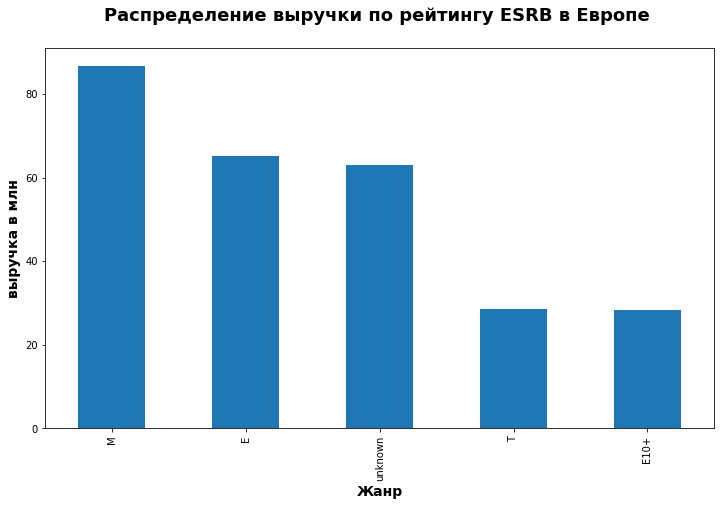

In [94]:
total_rating_eu.plot(y='eu_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по рейтингу ESRB в Европе \n', fontsize=18, fontweight="bold")
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

In [95]:
total_rating_jp = new_platform.pivot_table(index ='rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).nlargest(5, columns='jp_sales')

In [96]:
#total_rating_jp = total_rating_jp.query('rating != "unknown"')

Text(0, 0.5, 'выручка в млн')

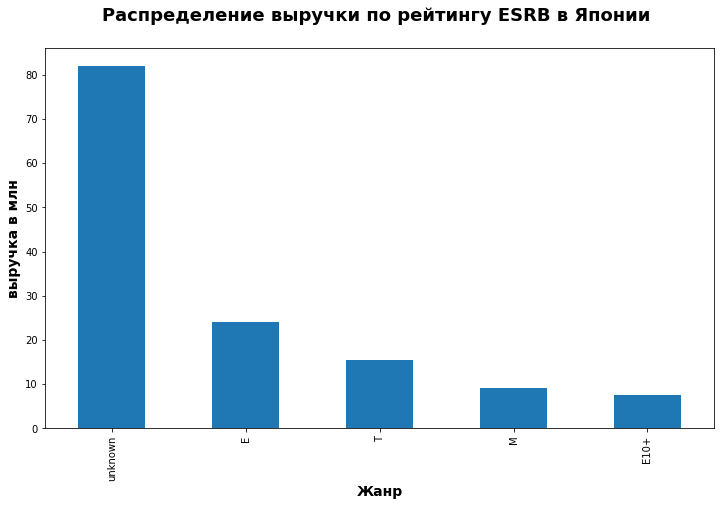

In [97]:
total_rating_jp.plot(y='jp_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение выручки по рейтингу ESRB в Японии \n', fontsize=18, fontweight="bold")
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("выручка в млн", fontsize=14, fontweight="bold")

## Вывод

В Северной Америке и Европе популярны игры с рейтингом 17+ , а в Японии игры с пустым значением по возрастным ограничением 

## Вывод

Исходя из анализа регионов - мы поняли, что самые популярные Платформы в Северной Америке - это PS4 и XOne, в Европе доминирует PS4, а в Японии - 3DS, самый популярный жанр в Северной Америке и Европе - это shooter , что и подтверждает рейтинг 17+ , а в Японии самый популярный жанр - симуляторы

# Проверка гипотез

## Cредние пользовательские рейтинги платформ Xbox One и PC.

Сформулируем нулевую и альтернативную гипотезы:

H0 - средние пользовательские рейтинги платформ Xbox One и PC равны ;

H1 - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC

In [98]:
xbox_one_tt = platform_year_filtred_top[(platform_year_filtred_top['platform']=='XOne')&(platform_year_filtred_top['user_score'] >= 0)]['user_score']
pc_tt = platform_year_filtred_top[(platform_year_filtred_top['platform']=='PC')&(platform_year_filtred_top['user_score'] >= 0)]['user_score']


In [99]:
xbox_one_tt_var = np.var(xbox_one_tt, ddof=1)
pc_tt_var = np.var(pc_tt, ddof=1)
print('Дисперсия платформы Xbox One:', round(xbox_one_tt_var, 2))
print()
print('Дисперсия платформы PC:', round(pc_tt_var, 2))

Дисперсия платформы Xbox One: 1.91

Дисперсия платформы PC: 2.77


In [100]:
alpha = 0.01

results = st.ttest_ind(xbox_one_tt, pc_tt, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


## Вывод

р-уровень значимости составил почти 55%, что значительно выше 1% => средний рейтинг платформ Xbox One и PC статистически значимо не отличается

## Cредние пользовательские рейтинги жанров Action и Sports

In [101]:
action_tt = platform_year_filtred_top[(platform_year_filtred_top['genre']=='Action')&(platform_year_filtred_top['user_score'] >= 0)]['user_score']
sports_tt = platform_year_filtred_top[(platform_year_filtred_top['genre']=='Sports')&(platform_year_filtred_top['user_score'] >= 0)]['user_score']

action_tt_var = np.var(action_tt, ddof=1)
sports_tt_var = np.var(sports_tt, ddof=1)

print('Дисперсия жанра Action:', round(action_tt_var, 2))
print()
print('Дисперсия жанра Sports:', round(sports_tt_var, 2))

Дисперсия жанра Action: 1.89

Дисперсия жанра Sports: 3.02


In [102]:
alpha = 0.01

results = st.ttest_ind(action_tt, sports_tt, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


## Вывод

p-уровень значимости слишком мал, гораздо меньше определенного нами порогового значения в 1% => средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

# Общий вывод

Проведя исследовательский анализ данных о продажах видеоигр в мире можно сказать следующее:


*   При сравнении за всеь период ТОП платформ были (PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS)
*   Но данный топ меняется, и при оценке за последние 5 лет стали (PS4, PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, DS, PSP)
*   Выявили потенциально прибыльные платформы в Северной Америке и в Европе это - XOne, PS4, а в Японии абсолютный лидер это - 3DS 
*   Выявили потенциально прибыльные жанры в Северной Америке и Европе это жанры Shooter, а в Японии это Simulation
*   Выявили закономерность, что оценки критиков влияют на продажи, а оценки пользователей - нет.
*   Самые полпулярные игры в Северной Америке и Европе имеют возрастное ограничение 17+, а в Японии полпулярны игры младших ограничений.

Исходя из выше сказанного рекомендуем создать игру в жанре Shooter, для платформ PS4 и Xone , но оставить поддержку в ps3, xbox 360. Рекламные кампании спланировать в Северной Америке и Европе - это самые потенциальные рынки и платформы, так как поддержка игр будет для двух платформ, это снизит издержки на техническую поддержку самой игры.





